# Cricket Player Performance Prediction model using machine learning

# Importing Libraries

In [3]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [4]:
data=pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\intersavvy\4\archive (3)\Batsman_Data.csv")
data1= pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\intersavvy\4\archive (3)\Bowler_data.csv")
data2= pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\intersavvy\4\archive (3)\Ground_Averages.csv")
data3 = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\intersavvy\4\archive (3)\ODI_Match_Results.csv")
data4= pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\intersavvy\4\archive (3)\ODI_Match_Totals.csv")
data5= pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\intersavvy\4\archive (3)\WC_players.csv")

In [5]:
data.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [6]:
data1.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [7]:
data2.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [8]:
data3.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [9]:
data4.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [10]:
data5.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


# Dimensions of Dataset

In [11]:
df=[data, data1,data2, data3, data4, data5]

In [12]:
def dementions(df):
    for i in df:
        print(i.shape)
        print('*'*100)
        print(i.info())
        print('*'*100)
        print(i.isna().sum())

In [13]:
dementions(df)

(11149, 13)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB
None
****************************************************************************************************
Unnamed: 0    0
Bat1 

Observation ==so from above mentioned infoemation we can see the in data 3 and data 4 have null values and other data frame dont have null values.

In [14]:
# Lets Check the Duplicates if avilable 
def remove_duplicates(df):
    for i in df:
        i.drop_duplicates(inplace=True)
        print(i.shape)
        print('*'*100)

In [15]:
remove_duplicates(df)

(11149, 13)
****************************************************************************************************
(11118, 14)
****************************************************************************************************
(106, 11)
****************************************************************************************************
(1322, 12)
****************************************************************************************************
(1296, 13)
****************************************************************************************************
(152, 3)
****************************************************************************************************


We can see there is no duplicate record found. so lets move further.

# Statistical Summary

In [16]:
# Lets understand data at high level check the stastics of dataset
def stat_summary(df):
    for i in df:
        print(i.describe(include='all'))
        print('*'*100)

In [17]:
stat_summary(df)

         Unnamed: 0   Bat1   Runs     BF     SR     4s     6s   Opposition  \
count   11149.00000  11149  11149  11149  11149  11149  11149        11149   
unique          NaN    323    180    163   2032     26     17           22   
top             NaN    DNB      -      -      -      0      0  v Sri Lanka   
freq            NaN   2043   2231   2231   2331   2901   6368         1283   
mean     5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
std      3218.58341    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
min         1.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
25%      2788.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
50%      5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
75%      8362.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
max     11149.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   

       Ground   Start Date    Match_ID    Batsman     Player_ID

Observation :- from this sattistical information we can see the uniqe, top, mean , standard deviation values. Also we noticed object type data which we need to convert in to int by using encoding methods.

In [18]:
# As our data set has start date or date column so lets first seaprate them into day, month and year wise and drop the orignal one
def seprate_date(df):
    for i in range(len(df)):
        if 'Start Date' in df[i].columns:
            df[i]['Year']=pd.to_datetime(df[i]['Start Date'])
            df[i]['Month']=df[i]['Year'].apply(lambda x:x.month) # Extracting Month
            df[i]['Day']=df[i]['Year'].apply(lambda x:x.day)  # Extracting day
            df[i]['year']=df[i]['Year'].apply(lambda x:x.year)  # Extracting year
            print(df[i].head())
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have 'Satrt Date' column")
            print("-------------------------")
            
            

In [19]:
seprate_date(df)

   Unnamed: 0 Bat1 Runs BF SR 4s 6s    Opposition   Ground   Start Date  \
0           1  DNB    -  -  -  -  -       v India   Nagpur  18 Dec 2009   
1           2  DNB    -  -  -  -  -       v India  Kolkata  24 Dec 2009   
2           3  DNB    -  -  -  -  -       v India    Delhi  27 Dec 2009   
3           4  DNB    -  -  -  -  -  v Bangladesh    Dhaka   4 Jan 2010   
4           5  DNB    -  -  -  -  -       v India    Dhaka   5 Jan 2010   

     Match_ID        Batsman  Player_ID       Year  Month  Day  year  
0  ODI # 2933  Oshane Thomas      49619 2009-12-18     12   18  2009  
1  ODI # 2935  Oshane Thomas      49619 2009-12-24     12   24  2009  
2  ODI # 2936  Oshane Thomas      49619 2009-12-27     12   27  2009  
3  ODI # 2937  Oshane Thomas      49619 2010-01-04      1    4  2010  
4  ODI # 2938  Oshane Thomas      49619 2010-01-05      1    5  2010  
-------------------------
   Unnamed: 0 Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground  \
0           1   8

In [20]:
# Drop irrelavent columns from the datasets
def drop_irrelevant(df):
    for i in range(len(df)):
        columns_to_drop = ['Unnamed: 0', 'Start Date', 'Year']
        irrelevant_columns = [col for col in columns_to_drop if col in df[i].columns]
        
        if irrelevant_columns:
            df[i].drop(columns=irrelevant_columns, axis=1, inplace=True)
            print("DataFrame", i, "after dropping irrelevant columns:")
            print(df[i].head())  # Printing the DataFrame after dropping columns
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have any irrelevant columns")
            print("-------------------------")


In [21]:
drop_irrelevant(df)

DataFrame 0 after dropping irrelevant columns:
  Bat1 Runs BF SR 4s 6s    Opposition   Ground    Match_ID        Batsman  \
0  DNB    -  -  -  -  -       v India   Nagpur  ODI # 2933  Oshane Thomas   
1  DNB    -  -  -  -  -       v India  Kolkata  ODI # 2935  Oshane Thomas   
2  DNB    -  -  -  -  -       v India    Delhi  ODI # 2936  Oshane Thomas   
3  DNB    -  -  -  -  -  v Bangladesh    Dhaka  ODI # 2937  Oshane Thomas   
4  DNB    -  -  -  -  -       v India    Dhaka  ODI # 2938  Oshane Thomas   

   Player_ID  Month  Day  year  
0      49619     12   18  2009  
1      49619     12   24  2009  
2      49619     12   27  2009  
3      49619      1    4  2010  
4      49619      1    5  2010  
-------------------------
DataFrame 1 after dropping irrelevant columns:
  Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground    Match_ID  \
0   8.0    0   57    0  7.12      -     -       v India   Nagpur  ODI # 2933   
1  10.0    0   55    2  5.50  27.50  30.0       v India  Ko

In [22]:
data

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,DNB,-,-,-,-,-,v India,Nagpur,ODI # 2933,Oshane Thomas,49619,12,18,2009
1,DNB,-,-,-,-,-,v India,Kolkata,ODI # 2935,Oshane Thomas,49619,12,24,2009
2,DNB,-,-,-,-,-,v India,Delhi,ODI # 2936,Oshane Thomas,49619,12,27,2009
3,DNB,-,-,-,-,-,v Bangladesh,Dhaka,ODI # 2937,Oshane Thomas,49619,1,4,2010
4,DNB,-,-,-,-,-,v India,Dhaka,ODI # 2938,Oshane Thomas,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,46,46,61,75.40,6,1,v Ireland,Dehradun,ODI # 4100,Gulbadin Naib,352048,2,28,2019
11145,3,3,6,50.00,0,0,v Ireland,Dehradun,ODI # 4101,Gulbadin Naib,352048,3,2,2019
11146,1,1,8,12.50,0,0,v Ireland,Dehradun,ODI # 4108,Gulbadin Naib,352048,3,8,2019
11147,DNB,-,-,-,-,-,v Scotland,Edinburgh,ODI # 4131,Gulbadin Naib,352048,5,10,2019


In [23]:
data1

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,8.0,0,57,0,7.12,-,-,v India,Nagpur,ODI # 2933,Suranga Lakmal,49619,12,18,2009
1,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,ODI # 2935,Suranga Lakmal,49619,12,24,2009
2,-,-,-,-,-,-,-,v India,Delhi,ODI # 2936,Suranga Lakmal,49619,12,27,2009
3,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,ODI # 2937,Suranga Lakmal,49619,1,4,2010
4,8.0,1,48,0,6.00,-,-,v India,Dhaka,ODI # 2938,Suranga Lakmal,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,4.0,0,41,0,10.25,-,-,v India,Dubai (DSC),ODI # 4046,Gulbadin Naib,352048,9,25,2018
11114,7.2,0,20,2,2.72,10.00,22.0,v Ireland,Dehradun,ODI # 4100,Gulbadin Naib,352048,2,28,2019
11115,-,-,-,-,-,-,-,v Ireland,Dehradun,ODI # 4101,Gulbadin Naib,352048,3,2,2019
11116,6.0,0,21,1,3.50,21.00,36.0,v Ireland,Dehradun,ODI # 4108,Gulbadin Naib,352048,3,8,2019


In [24]:
data2

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...,...,...
101,"Greenfield International Stadium, Thiruvananth...",2018-2018,1,1,0,0,209,11,280,19.00,4.47
102,Sylhet International Cricket Stadium - Bangladesh,2018-2018,1,1,0,0,400,11,531,36.36,4.51
103,"Rajiv Gandhi International Cricket Stadium, De...",2019-2019,5,4,0,1,1864,67,2524,27.82,4.43
104,"Wanderers Cricket Ground, Windhoek - Namibia",2019-2019,1,1,0,0,307,17,474,18.05,3.88


In [25]:
data3

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,won,85 runs,NaN,lost,1st,v India,Kolkata,ODI # 3315,Pakistan,7,1,3,2013
1,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,ODI # 3315,India,6,1,3,2013
2,lost,10 runs,NaN,lost,2nd,v India,Delhi,ODI # 3316,Pakistan,7,1,6,2013
3,won,10 runs,NaN,won,1st,v Pakistan,Delhi,ODI # 3316,India,6,1,6,2013
4,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,ODI # 3317,SriLanka,8,1,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,won,3 wickets,3.0,won,2nd,v Pakistan,Nottingham,ODI # 4138,England,1,5,17,2019
1318,aban,-,NaN,-,-,v Scotland,Edinburgh,ODI # 4138a,SriLanka,8,5,18,2019
1319,-,-,NaN,won,2nd,v Ireland,Belfast,ODI # 4139,Afghanistan,40,5,19,2019
1320,-,-,NaN,lost,2nd,v England,Leeds,ODI # 4140,Pakistan,7,5,19,2019


In [26]:
data4

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,250,48.3,5.15,NaN,1,won,v India,Kolkata,ODI # 3315,Pakistan,7,1,3,2013
1,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,ODI # 3315,India,6,1,3,2013
2,157,48.5,3.21,168.0,2,lost,v India,Delhi,ODI # 3316,Pakistan,7,1,6,2013
3,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,ODI # 3316,India,6,1,6,2013
4,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,ODI # 3317,SriLanka,8,1,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,ODI # 4138,Pakistan,7,5,17,2019
1292,341/7,49.3,6.88,341.0,2,won,v Pakistan,Nottingham,ODI # 4138,England,1,5,17,2019
1293,120/8,33.0,3.63,211.0,2,-,v Ireland,Belfast,ODI # 4139,Afghanistan,40,5,19,2019
1294,193/6,31.5,6.06,352.0,2,-,v England,Leeds,ODI # 4140,Pakistan,7,5,19,2019


In [27]:
data5

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan
...,...,...,...
147,Ashley Nurse,315594,WestIndies
148,Nicholas Pooran (wk),604302,WestIndies
149,Kemar Roach,230553,WestIndies
150,Andre Russell,276298,WestIndies


In [28]:
df_list=[data,data1,data2,data3,data4,data5]

In [29]:
# As we seen there are object type of data avilabe in the all the dataset so lets seaprate them and encode them into numeric form .
# lets seaprate the catogorical data & numirical data
from sklearn.preprocessing import LabelEncoder

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def get_categorical_columns(df_list):
    cat_col_list = []  # List to store categorical column names for each DataFrame

    for df in df_list:
        cat_col = []  # List to store categorical column names for the current DataFrame
        features = df.columns.values.tolist()

        for col in features:
            if df[col].dtype not in numerics:  # Check if the column's data type is non-numeric
                cat_col.append(col)

        cat_col_list.append(cat_col)

    return cat_col_list

def label_encode_categorical_columns(df_list):
    label = LabelEncoder()

    categorical_columns_list = get_categorical_columns(df_list)

    for i, cat_col in enumerate(categorical_columns_list):
        for col in cat_col:
            encoded_values = label.fit_transform(df_list[i][col])
            df_list[i][col] = encoded_values


In [30]:
label_encode_categorical_columns(df_list)

In [31]:
# Lest Check the encoded dataframes
data.head(2)

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,319,0,0,0,0,0,9,92,759,113,49619,12,18,2009
1,319,0,0,0,0,0,9,78,761,113,49619,12,24,2009


In [32]:
# Lest Check the encoded dataframes
data1.head(2)

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,49,1,59,1,412,0,0,9,92,759,138,49619,12,18,2009
1,12,1,57,3,316,103,77,9,78,761,138,49619,12,24,2009


In [33]:
# Lest Check the encoded dataframes
data2.head(2)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,23,4,4,4,0,0,2161,72,2297,30.01,5.64
1,26,6,4,4,0,0,1789,75,2331,23.85,4.60


In [34]:
# Lest Check the encoded dataframes
data3.head(2)

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6,160,NaN,1,1,5,57,0,6,7,1,3,2013
1,3,160,NaN,2,2,11,57,0,4,6,1,3,2013


In [35]:
# Lest Check the encoded dataframes
data4.head(2)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,404,48.3,165,NaN,1,4,5,57,0,6,7,1,3,2013
1,115,48.0,25,251.0,2,1,11,57,0,4,6,1,3,2013


In [36]:
# Lest Check the encoded dataframes
data5.head(2)

,Player,ID,Country
0,42,352048,0
1,118,793463,0


#As we seen the in dataset no3 and 4 has null values so lets treat them by using iterative imputation techniques

In [37]:
data3.isnull().sum()

Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [38]:
data4.isnull().sum()

Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_list2 = [data3, data4]

def treat_missing_value(df_list2):
    for i in range(len(df_list2)):
        df_imputed = imputer.fit_transform(df_list2[i])
        df_list2[i] = pd.DataFrame(df_imputed, columns=df_list2[i].columns)
        print("DataFrame", i, "after imputation:")
        print(df_list2[i].isnull().sum()) #Lets Check the Values treated well or not
        print("-------------------------")


In [40]:
treat_missing_value(df_list2)

DataFrame 0 after imputation:
Result        0
Margin        0
BR            0
Toss          0
Bat           0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Month         0
Day           0
year          0
dtype: int64
-------------------------
DataFrame 1 after imputation:
Score         0
Overs         0
RPO           0
Target        0
Inns          0
Result        0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Month         0
Day           0
year          0
dtype: int64
-------------------------


In [41]:
data3=df_list2[0]
data4=df_list2[1]

In [42]:
data

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,319,0,0,0,0,0,9,92,759,113,49619,12,18,2009
1,319,0,0,0,0,0,9,78,761,113,49619,12,24,2009
2,319,0,0,0,0,0,9,37,762,113,49619,12,27,2009
3,319,0,0,0,0,0,4,38,763,113,49619,1,4,2010
4,319,0,0,0,0,0,9,38,764,113,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,203,121,121,1409,22,2,10,36,1809,42,352048,2,28,2019
11145,167,103,119,969,1,1,10,36,1810,42,352048,3,2,2019
11146,2,2,141,330,1,1,10,36,1817,42,352048,3,8,2019
11147,319,0,0,0,0,0,16,46,1834,42,352048,5,10,2019


In [43]:
data1

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,49,1,59,1,412,0,0,9,92,759,138,49619,12,18,2009
1,12,1,57,3,316,103,77,9,78,761,138,49619,12,24,2009
2,0,0,0,0,0,0,0,9,37,762,138,49619,12,27,2009
3,55,2,66,3,406,120,70,4,38,763,138,49619,1,4,2010
4,49,2,49,1,349,0,0,9,38,764,138,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,25,1,42,1,35,0,0,9,40,1758,42,352048,9,25,2018
11114,45,1,19,3,112,5,60,10,36,1809,42,352048,2,28,2019
11115,0,0,0,0,0,0,0,10,36,1810,42,352048,3,2,2019
11116,37,1,20,2,171,80,83,10,36,1817,42,352048,3,8,2019


In [44]:
data2

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,23,4,4,4,0,0,2161,72,2297,30.01,5.64
1,26,6,4,4,0,0,1789,75,2331,23.85,4.60
2,55,6,15,15,0,0,7656,217,8482,35.28,5.41
3,76,2,2,2,0,0,1163,26,1200,44.73,5.81
4,0,6,10,10,0,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...,...,...
101,32,18,1,1,0,0,209,11,280,19.00,4.47
102,90,18,1,1,0,0,400,11,531,36.36,4.51
103,70,19,5,4,0,1,1864,67,2524,27.82,4.43
104,100,19,1,1,0,0,307,17,474,18.05,3.88


In [45]:
data3

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6.0,160.0,52.000182,1.0,1.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0
1,3.0,160.0,52.728414,2.0,2.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0
2,3.0,3.0,20.689046,1.0,2.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0
3,6.0,3.0,21.548194,2.0,1.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0
4,3.0,10.0,19.527705,1.0,2.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,6.0,99.0,3.000000,2.0,2.0,11.0,72.0,755.0,3.0,1.0,5.0,17.0,2019.0
1318,1.0,0.0,32.599723,0.0,0.0,12.0,38.0,756.0,8.0,8.0,5.0,18.0,2019.0
1319,0.0,0.0,32.327406,2.0,2.0,6.0,7.0,757.0,0.0,40.0,5.0,19.0,2019.0
1320,0.0,0.0,29.815762,1.0,2.0,3.0,60.0,758.0,6.0,7.0,5.0,19.0,2019.0


In [46]:
data4

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,404.0,48.3,165.0,241.723435,1.0,4.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0
1,115.0,48.0,25.0,251.000000,2.0,1.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0
2,93.0,48.5,18.0,168.000000,2.0,1.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0
3,120.0,43.4,48.0,176.027214,1.0,4.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0
4,199.0,40.0,146.0,306.000000,2.0,1.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,750.0,50.0,309.0,382.947700,1.0,1.0,3.0,72.0,739.0,6.0,7.0,5.0,17.0,2019.0
1292,753.0,49.3,315.0,341.000000,2.0,4.0,11.0,72.0,739.0,3.0,1.0,5.0,17.0,2019.0
1293,27.0,33.0,38.0,211.000000,2.0,0.0,6.0,7.0,740.0,0.0,40.0,5.0,19.0,2019.0
1294,187.0,31.5,249.0,352.000000,2.0,0.0,3.0,60.0,741.0,6.0,7.0,5.0,19.0,2019.0


In [47]:
data5

,Player,ID,Country
0,42,352048,0
1,118,793463,0
2,5,440963,0
3,13,320652,0
4,30,516561,0
...,...,...,...
147,14,315594,9
148,111,604302,9
149,75,230553,9
150,10,276298,9


# Data Integration and Merging

In [48]:
#Lets Create a master dataset and the build the model 
# so first we are going to merge 2 dataset and then further  
batsman_join_bowler=pd.merge(data,data1,on=['Match_ID','Player_ID','Opposition','Ground','Month','Day','year'], how='inner')
batsman_join_bowler

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Day,year,Overs,Mdns,Runs_y,Wkts,Econ,Ave,SR_y,Bowler
0,319,0,0,0,0,0,9,92,759,113,...,18,2009,49,1,59,1,412,0,0,138
1,319,0,0,0,0,0,9,78,761,113,...,24,2009,12,1,57,3,316,103,77,138
2,319,0,0,0,0,0,9,37,762,113,...,27,2009,0,0,0,0,0,0,0,138
3,319,0,0,0,0,0,4,38,763,113,...,4,2010,55,2,66,3,406,120,70,138
4,319,0,0,0,0,0,9,38,764,113,...,5,2010,49,2,49,1,349,0,0,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,99,57,104,826,2,1,9,40,1758,42,...,25,2018,25,1,42,1,35,0,0,42
11114,203,121,121,1409,22,2,10,36,1809,42,...,28,2019,45,1,19,3,112,5,60,42
11115,167,103,119,969,1,1,10,36,1810,42,...,2,2019,0,0,0,0,0,0,0,42
11116,2,2,141,330,1,1,10,36,1817,42,...,8,2019,37,1,20,2,171,80,83,42


In [49]:
batsman_join_bowler.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs',
       'Mdns', 'Runs_y', 'Wkts', 'Econ', 'Ave', 'SR_y', 'Bowler'],
      dtype='object')

In [50]:
data2.columns

Index(['Ground', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts', 'Balls',
       'Ave', 'RPO'],
      dtype='object')

In [51]:
#Lets Join data2
batsman_join_bowler_GrondAvg=pd.merge(batsman_join_bowler,data2,on=['Ground'], how='inner')
batsman_join_bowler_GrondAvg

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Span,Mat,Won,Tied,NR,Runs,Wkts_y,Balls,Ave_y,RPO
0,319,0,0,0,0,0,9,92,759,113,...,6,16,14,0,2,6890,202,7508,34.10,5.50
1,12,7,21,1757,24,10,9,92,84,20,...,6,16,14,0,2,6890,202,7508,34.10,5.50
2,217,128,104,240,3,1,9,92,391,20,...,6,16,14,0,2,6890,202,7508,34.10,5.50
3,184,111,81,572,20,1,9,92,759,11,...,6,16,14,0,2,6890,202,7508,34.10,5.50
4,319,0,0,0,0,0,9,92,927,25,...,6,16,14,0,2,6890,202,7508,34.10,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,217,128,117,1780,22,2,10,36,1817,117,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9075,180,109,84,389,13,9,10,36,1819,117,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9076,203,121,121,1409,22,2,10,36,1809,42,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9077,167,103,119,969,1,1,10,36,1810,42,...,4,4,4,0,0,1664,56,1987,29.71,5.02


In [52]:
batsman_join_bowler_GrondAvg.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO'],
      dtype='object')

In [53]:
data3.columns

Index(['Result', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition', 'Ground',
       'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [54]:
data4.columns

Index(['Score', 'Overs', 'RPO', 'Target', 'Inns', 'Result', 'Opposition',
       'Ground', 'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [55]:
#Lets Join data3 & Data4
OD_Total_result=pd.merge(data3,data4,on=['Ground','Country','Country_ID','Month','Day','year','Opposition'], how='inner')
OD_Total_result

,Result_x,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID_x,Country,Country_ID,Month,Day,year,Score,Overs,RPO,Target,Inns,Result_y,Match_ID_y
0,6.0,160.0,52.000182,1.0,1.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0,404.0,48.3,165.0,241.723435,1.0,4.0,0.0
1,3.0,160.0,52.728414,2.0,2.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0,115.0,48.0,25.0,251.000000,2.0,1.0,0.0
2,3.0,3.0,20.689046,1.0,2.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0,93.0,48.5,18.0,168.000000,2.0,1.0,1.0
3,6.0,3.0,21.548194,2.0,1.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0,120.0,43.4,48.0,176.027214,1.0,4.0,1.0
4,3.0,10.0,19.527705,1.0,2.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0,199.0,40.0,146.0,306.000000,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,3.0,99.0,3.000000,1.0,1.0,3.0,72.0,755.0,6.0,7.0,5.0,17.0,2019.0,750.0,50.0,309.0,382.947700,1.0,1.0,739.0
1292,6.0,99.0,3.000000,2.0,2.0,11.0,72.0,755.0,3.0,1.0,5.0,17.0,2019.0,753.0,49.3,315.0,341.000000,2.0,4.0,739.0
1293,0.0,0.0,32.327406,2.0,2.0,6.0,7.0,757.0,0.0,40.0,5.0,19.0,2019.0,27.0,33.0,38.0,211.000000,2.0,0.0,740.0
1294,0.0,0.0,29.815762,1.0,2.0,3.0,60.0,758.0,6.0,7.0,5.0,19.0,2019.0,187.0,31.5,249.0,352.000000,2.0,0.0,741.0


In [56]:
#Lets Join batsman_join_bowler_GrondAvg & OD_Total_result
batsman_join_bowler_GrondAvg_OD=pd.merge(batsman_join_bowler_GrondAvg,OD_Total_result,on=['Ground','Month','Day','year'], how='inner')
batsman_join_bowler_GrondAvg_OD

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Match_ID_x,Country,Country_ID,Score,Overs_y,RPO_y,Target,Inns,Result_y,Match_ID_y
0,140,86,14,677,1,1,15,1,1225,113,...,126.0,8.0,8.0,294.0,48.5,111.0,297.147940,1.0,1.0,123.0
1,140,86,14,677,1,1,15,1,1225,113,...,126.0,6.0,7.0,298.0,41.1,196.0,226.000000,2.0,4.0,123.0
2,0,1,108,1,1,1,15,1,1225,80,...,126.0,8.0,8.0,294.0,48.5,111.0,297.147940,1.0,1.0,123.0
3,0,1,108,1,1,1,15,1,1225,80,...,126.0,6.0,7.0,298.0,41.1,196.0,226.000000,2.0,4.0,123.0
4,277,158,141,4,2,1,15,1,1225,78,...,126.0,8.0,8.0,294.0,48.5,111.0,297.147940,1.0,1.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,191,115,131,1056,2,2,10,36,1819,99,...,733.0,7.0,3.0,734.0,50.0,297.0,298.485314,1.0,4.0,719.0
1040,284,161,16,1375,22,9,10,36,1819,13,...,733.0,8.0,8.0,29.0,24.0,154.0,193.000000,2.0,1.0,719.0
1041,284,161,16,1375,22,9,10,36,1819,13,...,733.0,7.0,3.0,734.0,50.0,297.0,298.485314,1.0,4.0,719.0
1042,180,109,84,389,13,9,10,36,1819,117,...,733.0,8.0,8.0,29.0,24.0,154.0,193.000000,2.0,1.0,719.0


In [57]:
batsman_join_bowler_GrondAvg_OD.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
       'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Match_ID_y'],
      dtype='object')

In [58]:
data5=data5.rename(columns={'ID':'Player_ID'})

In [59]:
#Lets Join batsman_join_bowler_GrondAvg_OD & data5
master_after_join=pd.merge(batsman_join_bowler_GrondAvg_OD,data5,on=['Player_ID','Country'], how='inner')
master_after_join

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Country,Country_ID,Score,Overs_y,RPO_y,Target,Inns,Result_y,Match_ID_y,Player
0,0,1,108,1,1,1,15,1,1225,80,...,8.0,8.0,294.0,48.5,111.0,297.147940,1.0,1.0,123.0,80
1,0,1,2,1,1,1,15,1,1227,80,...,8.0,8.0,335.0,49.4,124.0,233.000000,2.0,4.0,125.0,80
2,2,2,130,518,1,1,0,1,1750,80,...,8.0,8.0,98.0,41.2,48.0,250.000000,2.0,1.0,648.0,80
3,319,0,0,0,0,0,3,2,1106,80,...,8.0,8.0,133.0,40.1,81.0,171.000000,2.0,4.0,4.0,80
4,277,158,141,4,2,1,15,1,1225,78,...,8.0,8.0,294.0,48.5,111.0,297.147940,1.0,1.0,123.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,319,0,0,0,0,0,13,5,1590,9,...,7.0,3.0,76.0,32.2,114.0,150.000000,2.0,4.0,488.0,9
506,154,96,109,946,18,1,17,5,1590,93,...,5.0,5.0,75.0,41.1,36.0,238.692029,1.0,1.0,488.0,94
507,5,3,130,535,13,1,15,5,1485,93,...,5.0,5.0,476.0,42.4,262.0,263.000000,2.0,4.0,383.0,94
508,255,147,74,849,1,1,3,5,1574,93,...,5.0,5.0,575.0,50.0,219.0,268.556106,1.0,4.0,472.0,94


So now oue master datset is reday so lets move further.

# Data Preparation for Model Building

In [60]:
# Calculate Batting Average for each player
master_after_join['Batting Average'] = master_after_join['Bat1'] / master_after_join['Inns']

In [61]:
# Display the Batting Average for each player
print(master_after_join[['Player', 'Batting Average']])

     Player  Batting Average
0        80              0.0
1        80              0.0
2        80              1.0
3        80            159.5
4        78            277.0
..      ...              ...
505       9            159.5
506      94            154.0
507      94              2.5
508      94            255.0
509      94            180.0

[510 rows x 2 columns]


In [62]:
# Calculate Bowling Average for each player
master_after_join['Bowling Average'] = master_after_join['Runs_y'] / master_after_join['Wkts_y']

# Display the Bowling Average for each player
print(master_after_join[['Player', 'Bowling Average']])

     Player  Bowling Average
0        80         2.733333
1        80         3.933333
2        80         4.600000
3        80         0.941176
4        78         0.000000
..      ...              ...
505       9         0.729167
506      94         1.979167
507      94         1.208333
508      94         0.937500
509      94         0.020833

[510 rows x 2 columns]


In [63]:
# Filter out rows with zero or missing values in 'BF'
master_after_join = master_after_join[master_after_join['BF'] > 0]

In [64]:
master_after_join.head(2)

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Score,Overs_y,RPO_y,Target,Inns,Result_y,Match_ID_y,Player,Batting Average,Bowling Average
0,0,1,108,1,1,1,15,1,1225,80,...,294.0,48.5,111.0,297.14794,1.0,1.0,123.0,80,0.0,2.733333
1,0,1,2,1,1,1,15,1,1227,80,...,335.0,49.4,124.0,233.00000,2.0,4.0,125.0,80,0.0,3.933333


In [65]:
# Calculate Strike Rate (Batting) for each player
master_after_join['Strike Rate (Batting)'] = (master_after_join['Bat1'] / master_after_join['BF']) * 100

# Display the Strike Rate (Batting) for each player
print(master_after_join[['Player', 'Strike Rate (Batting)']])

     Player  Strike Rate (Batting)
0        80               0.000000
1        80               0.000000
2        80               1.538462
4        78             196.453901
5        78             207.070707
..      ...                    ...
502      57             200.970874
506      94             141.284404
507      94               3.846154
508      94             344.594595
509      94             187.500000

[444 rows x 2 columns]


In [66]:
# Calculate Economy Rate (Bowling) for each player
master_after_join['Economy Rate (Bowling)'] = (master_after_join['Runs_y'] / master_after_join['Overs_y'])

# Display the Economy Rate (Bowling) for each player
print(master_after_join[['Player', 'Economy Rate (Bowling)']])

     Player  Economy Rate (Bowling)
0        80                0.845361
1        80                1.194332
2        80                1.674757
4        78                0.000000
5        78                0.000000
..      ...                     ...
502      57                1.000000
506      94                2.311436
507      94                1.367925
508      94                0.900000
509      94                0.020000

[444 rows x 2 columns]


In [67]:
# Calculate the total Maiden Overs for each player
master_after_join['Maiden Overs Total'] = master_after_join['Mdns'].sum()

# Display the total Maiden Overs for each player
print(master_after_join[['Player', 'Maiden Overs Total']])

     Player  Maiden Overs Total
0        80                 262
1        80                 262
2        80                 262
4        78                 262
5        78                 262
..      ...                 ...
502      57                 262
506      94                 262
507      94                 262
508      94                 262
509      94                 262

[444 rows x 2 columns]


In [68]:
# Step 1: Choose relevant performance metrics
batting_average = master_after_join['Batting Average']
bowling_average = master_after_join['Bowling Average']
strike_rate_batting = master_after_join['Strike Rate (Batting)']
economy_rate_bowling = master_after_join['Economy Rate (Bowling)']
maiden_overs = master_after_join['Maiden Overs Total']

#Step 2: Normalize the selected performance metrics
# You can use Min-Max Scaling or Z-score normalization
def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

normalized_batting_average = min_max_scaling(batting_average)
normalized_bowling_average = min_max_scaling(bowling_average)
normalized_strike_rate_batting = min_max_scaling(strike_rate_batting)
normalized_economy_rate_bowling = min_max_scaling(economy_rate_bowling)
# normalized_maiden_overs = min_max_scaling(maiden_overs) we are not using this its giving NAN

# Step 3: Assign weights to each performance metric
batting_weight = 0.3
bowling_weight = 0.25
strike_rate_weight = 0.2
economy_rate_weight = 0.25


# Step 4: Calculate the composite performance score for each player
master_after_join['Player Performance Score'] = (
    batting_weight * normalized_batting_average +
    bowling_weight * normalized_bowling_average +
    strike_rate_weight * normalized_strike_rate_batting +
    economy_rate_weight * normalized_economy_rate_bowling )

# Step 5: Display the Player Performance Score for each player
print(master_after_join[['Player', 'Player Performance Score']])


     Player  Player Performance Score
0        80                  0.179688
1        80                  0.256694
2        80                  0.324796
4        78                  0.267204
5        78                  0.102335
..      ...                       ...
502      57                  0.327119
506      94                  0.423807
507      94                  0.166335
508      94                  0.363639
509      94                  0.177696

[444 rows x 2 columns]


In [69]:
master_after_join.shape

(444, 55)

In [70]:
master_after_join.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
       'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Match_ID_y', 'Player', 'Batting Average',
       'Bowling Average', 'Strike Rate (Batting)', 'Economy Rate (Bowling)',
       'Maiden Overs Total', 'Player Performance Score'],
      dtype='object')

# Feature Engineering 

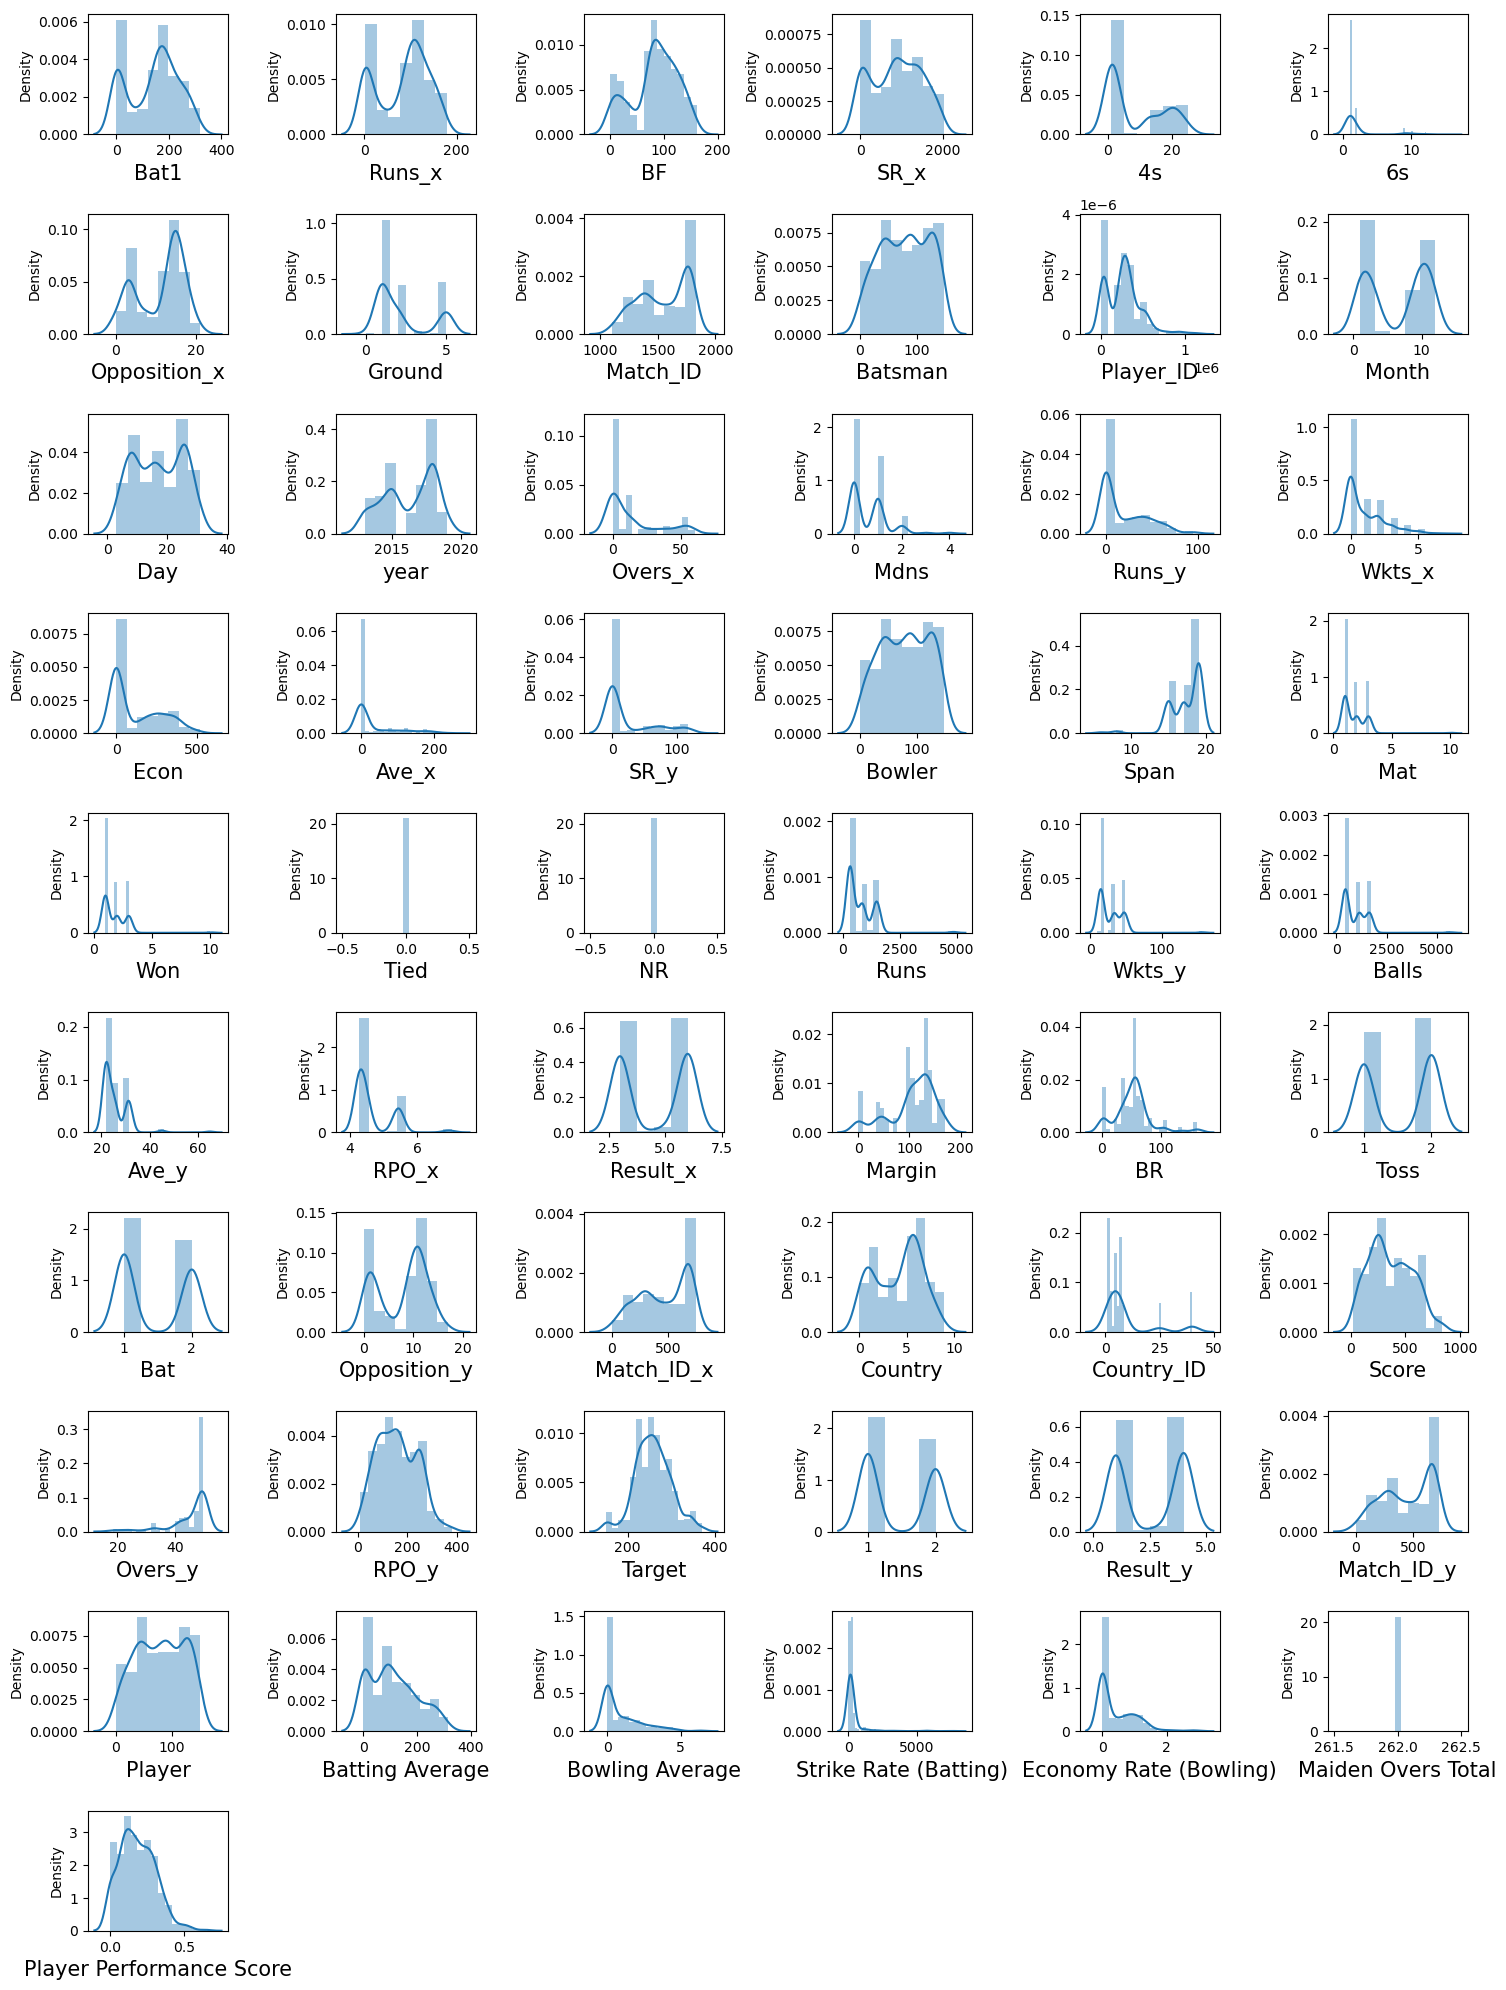

In [71]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.distplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [72]:
# From above distribution we can see there are skewed data avilabe so lets check again by using skew method
master_after_join.skew()

Bat1                       -0.233887
Runs_x                     -0.346075
BF                         -0.445824
SR_x                       -0.039165
4s                          0.578048
6s                          2.952126
Opposition_x               -0.516344
Ground                      0.970068
Match_ID                   -0.326713
Batsman                    -0.105322
Player_ID                   0.979422
Month                      -0.134240
Day                        -0.024541
year                       -0.322862
Overs_x                     1.262778
Mdns                        1.473151
Runs_y                      1.019444
Wkts_x                      1.420556
Econ                        0.740863
Ave_x                       1.770862
SR_y                        1.372929
Bowler                     -0.097655
Span                       -2.101193
Mat                         3.289249
Won                         3.289249
Tied                        0.000000
NR                          0.000000
R

In [73]:
master_after_join.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
       'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Match_ID_y', 'Player', 'Batting Average',
       'Bowling Average', 'Strike Rate (Batting)', 'Economy Rate (Bowling)',
       'Maiden Overs Total', 'Player Performance Score'],
      dtype='object')

In [74]:
# Lets Seaprate the skewed columns or featres based on above thumb rule
master_after_join.skew()[(master_after_join.skew() >= 0.5) & (master_after_join.skew() >= -0.5)]


4s                        0.578048
6s                        2.952126
Ground                    0.970068
Player_ID                 0.979422
Overs_x                   1.262778
Mdns                      1.473151
Runs_y                    1.019444
Wkts_x                    1.420556
Econ                      0.740863
Ave_x                     1.770862
SR_y                      1.372929
Mat                       3.289249
Won                       3.289249
Runs                      2.546417
Wkts_y                    2.866807
Balls                     2.933363
Ave_y                     3.219416
RPO_x                     1.697543
BR                        1.052424
Country_ID                2.054187
Bowling Average           1.558220
Strike Rate (Batting)     5.879068
Economy Rate (Bowling)    1.403963
dtype: float64

In [75]:
skew_col=['4s','6s','Ground','Player_ID','Overs_x','Mdns','Runs_y','Wkts_x','Econ','Ave_x','SR_y','Mat','Won','Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x','BR','Country_ID','Bowling Average','Bowling Average','Economy Rate (Bowling)']
len(skew_col)

23

In [76]:
# Now lets use Power transformation for remove the skewness form Data Set 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
master_after_join[skew_col]=pt.fit_transform(master_after_join[skew_col].values)
master_after_join[skew_col]

,4s,6s,Ground,Player_ID,Overs_x,Mdns,Runs_y,Wkts_x,Econ,Ave_x,...,Runs,Wkts_y,Balls,Ave_y,RPO_x,BR,Country_ID,Bowling Average,Bowling Average,Economy Rate (Bowling)
0,-1.026769,-0.583898,-0.800802,-1.180360,1.311568,0.916445,1.131556,0.592840,1.165113,-0.650676,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,0.108478,0.524365,1.405157,1.405157,1.112272
1,-1.026769,-0.583898,-0.800802,-1.180360,0.803906,0.916445,1.262451,1.647705,1.164318,1.476073,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,-2.044235,0.524365,1.576443,1.576443,1.370392
2,-1.026769,-0.583898,-0.800802,-1.180360,0.803906,0.916445,1.316390,1.110734,1.201152,1.626443,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,0.563164,0.524365,1.637546,1.637546,1.579633
4,-0.494699,-0.583898,-0.800802,0.360856,-0.912669,-0.913790,-0.915953,-0.900441,-0.922171,-0.650676,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,0.108478,0.524365,-0.876094,-0.876094,-0.878602
5,1.161413,2.097507,-0.800802,0.360856,-0.912669,-0.913790,-0.915953,-0.900441,-0.922171,-0.650676,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,-2.044235,0.524365,-0.876094,-0.876094,-0.878602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1.279046,-0.583898,1.479571,0.582794,1.193187,0.916445,1.203885,0.592840,1.278368,-0.650676,...,1.285847,1.252428,1.242065,1.372273,1.525265,0.261698,0.022895,0.770502,0.770502,1.242550
506,1.161413,-0.583898,1.479571,1.104869,0.839262,0.916445,1.422196,0.592840,1.082721,-0.650676,...,1.285847,1.252428,1.242065,1.372273,1.525265,1.605729,0.022895,1.218694,1.218694,1.733722
507,0.956128,-0.583898,1.479571,1.104869,1.193187,0.916445,1.256476,1.110734,0.599664,1.620341,...,1.285847,1.252428,1.242065,1.372273,1.525265,-2.044235,0.022895,0.880685,0.880685,1.460075
508,-1.026769,-0.583898,1.479571,1.104869,0.803906,1.501488,1.165771,1.538131,1.074806,1.486335,...,1.285847,1.252428,1.242065,1.372273,1.525265,0.261698,0.022895,0.691085,0.691085,1.161777


In [77]:
# Lest Check again the Skewed value 
master_after_join.skew()

Bat1                       -0.233887
Runs_x                     -0.346075
BF                         -0.445824
SR_x                       -0.039165
4s                          0.230032
6s                          1.192112
Opposition_x               -0.516344
Ground                      0.096855
Match_ID                   -0.326713
Batsman                    -0.105322
Player_ID                  -0.198176
Month                      -0.134240
Day                        -0.024541
year                       -0.322862
Overs_x                     0.252258
Mdns                        0.265824
Runs_y                      0.220357
Wkts_x                      0.329869
Econ                        0.183360
Ave_x                       0.903190
SR_y                        0.890700
Bowler                     -0.097655
Span                       -2.101193
Mat                         0.277049
Won                         0.277049
Tied                        0.000000
NR                          0.000000
R

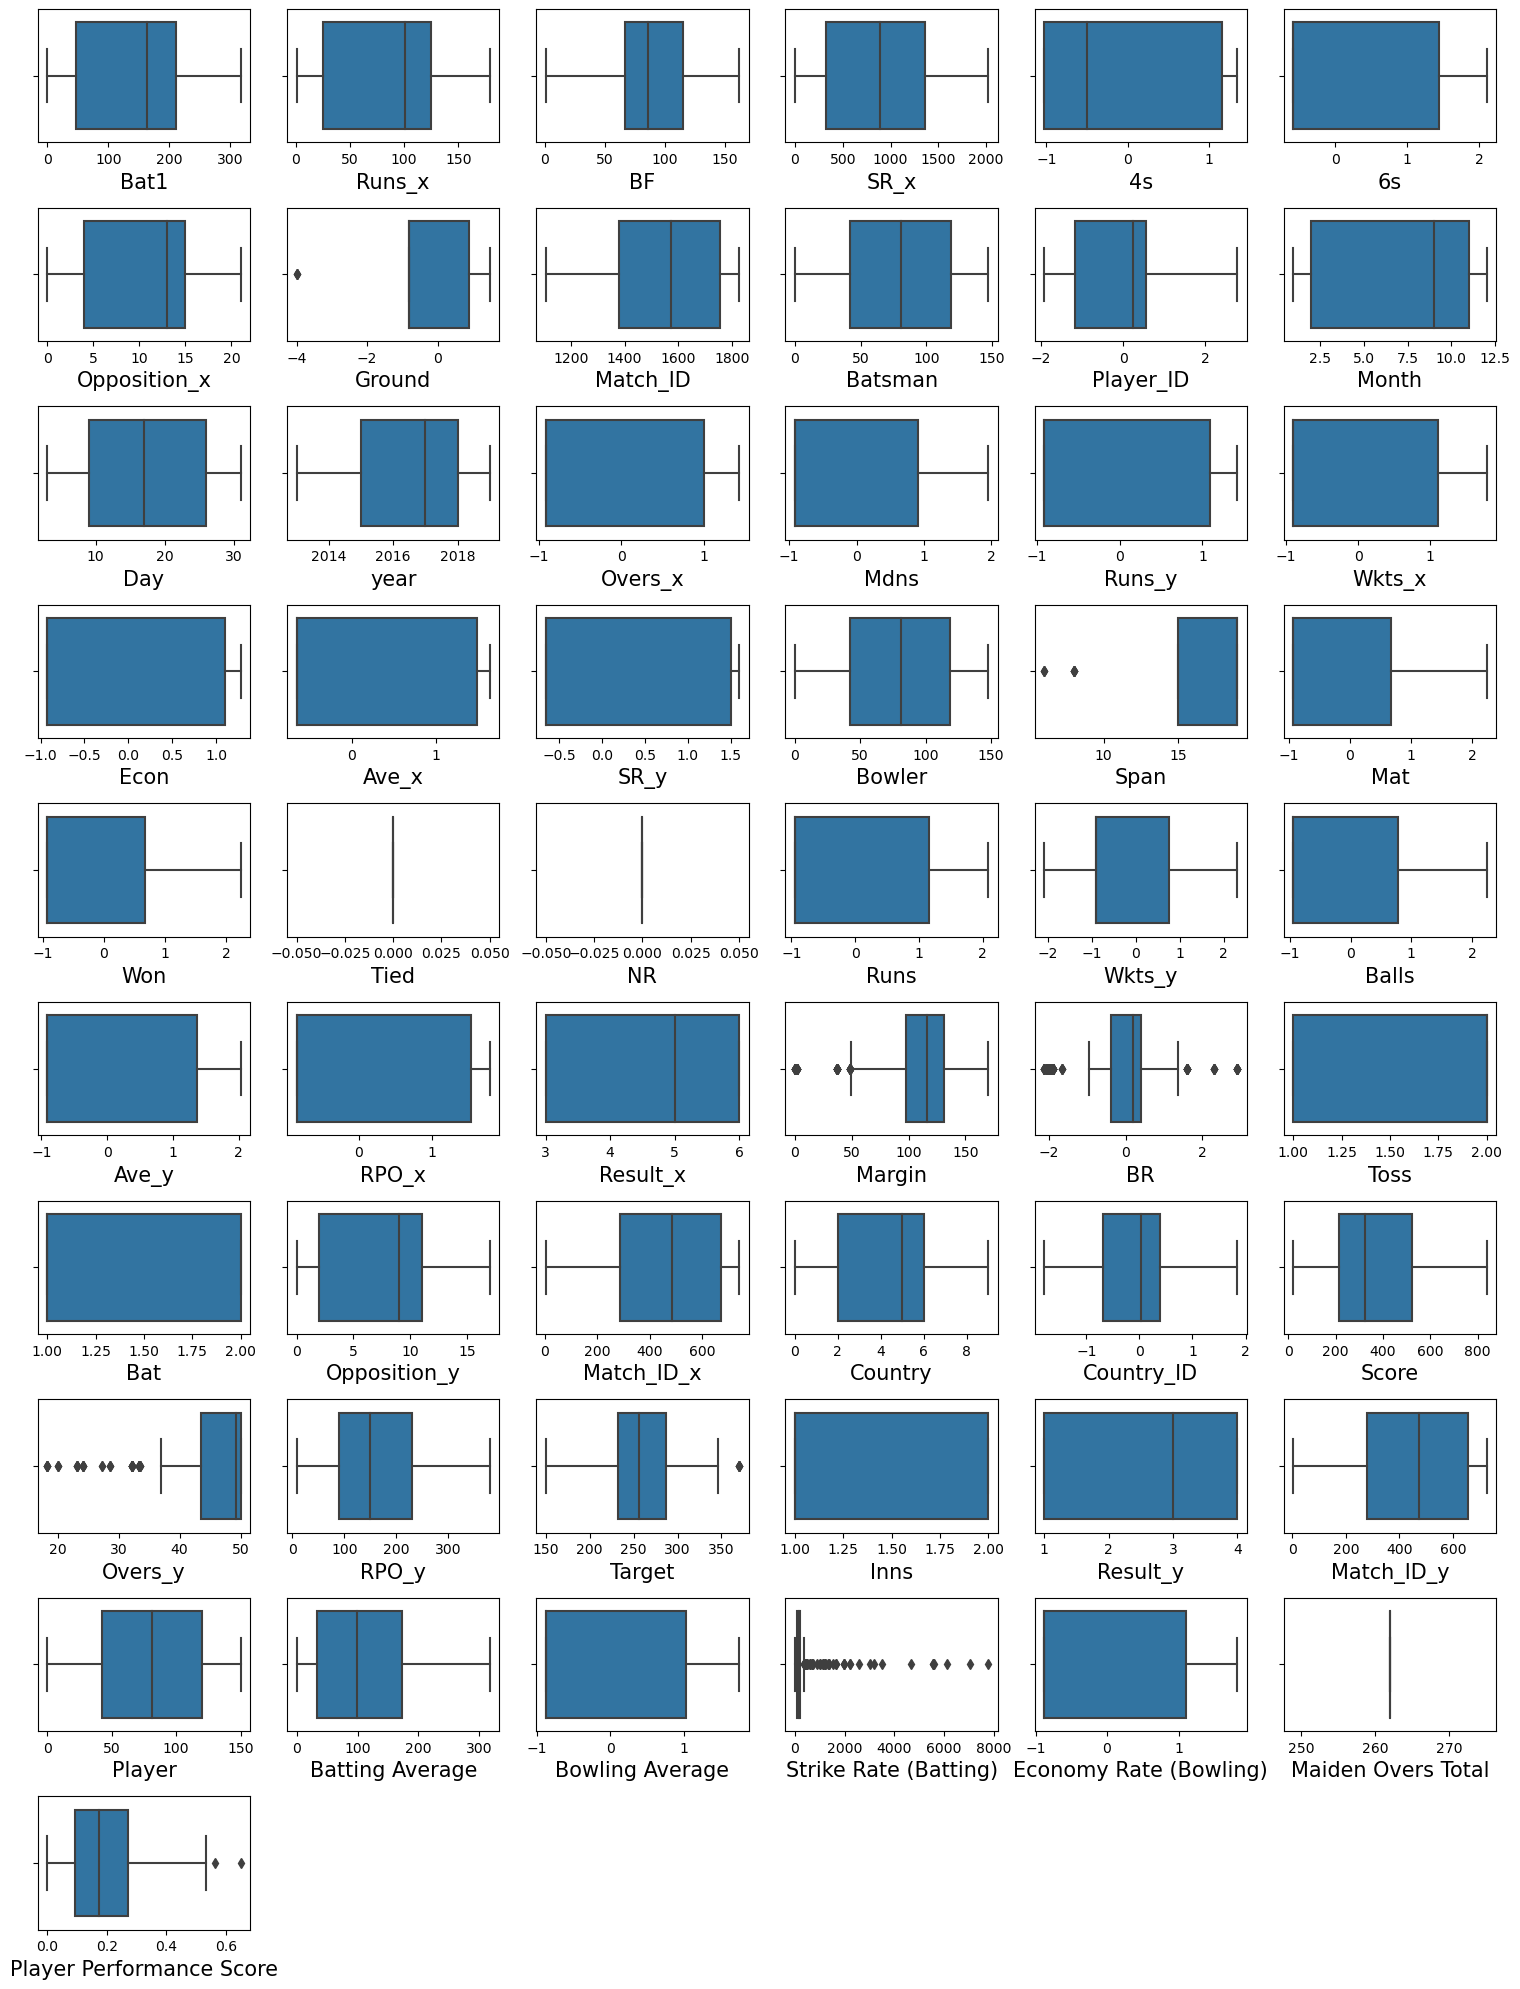

In [78]:
# Now almost All skewness we removed so move further
#Let's check for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [79]:
# So from graph we can see the outlier are present in the some columns so lets remove them first 
outliers_col=['Margin', 'BR','Overs_y','Target','Ground','Span','Strike Rate (Batting)','Player Performance Score']

In [80]:
# Remove the outliers by using Z score
from scipy.stats import zscore
z_score=zscore(master_after_join[outliers_col])
z_score_abs=np.abs(z_score)
filter_entry=(z_score_abs<3).all(axis=1)
master_after_join=master_after_join[filter_entry]
master_after_join.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Inns,Result_y,Match_ID_y,Player,Batting Average,Bowling Average,Strike Rate (Batting),Economy Rate (Bowling),Maiden Overs Total,Player Performance Score
0,0,1,108,1,-1.026769,-0.583898,15,-0.800802,1225,80,...,1.0,1.0,123.0,80,0.0,1.405157,0.000000,1.112272,262,0.179688
1,0,1,2,1,-1.026769,-0.583898,15,-0.800802,1227,80,...,2.0,4.0,125.0,80,0.0,1.576443,0.000000,1.370392,262,0.256694
2,2,2,130,518,-1.026769,-0.583898,0,-0.800802,1750,80,...,2.0,1.0,648.0,80,1.0,1.637546,1.538462,1.579633,262,0.324796
4,277,158,141,4,-0.494699,-0.583898,15,-0.800802,1225,78,...,1.0,1.0,123.0,78,277.0,-0.876094,196.453901,-0.878602,262,0.267204
5,205,122,99,256,1.161413,2.097507,15,-0.800802,1227,78,...,2.0,4.0,125.0,78,102.5,-0.876094,207.070707,-0.878602,262,0.102335


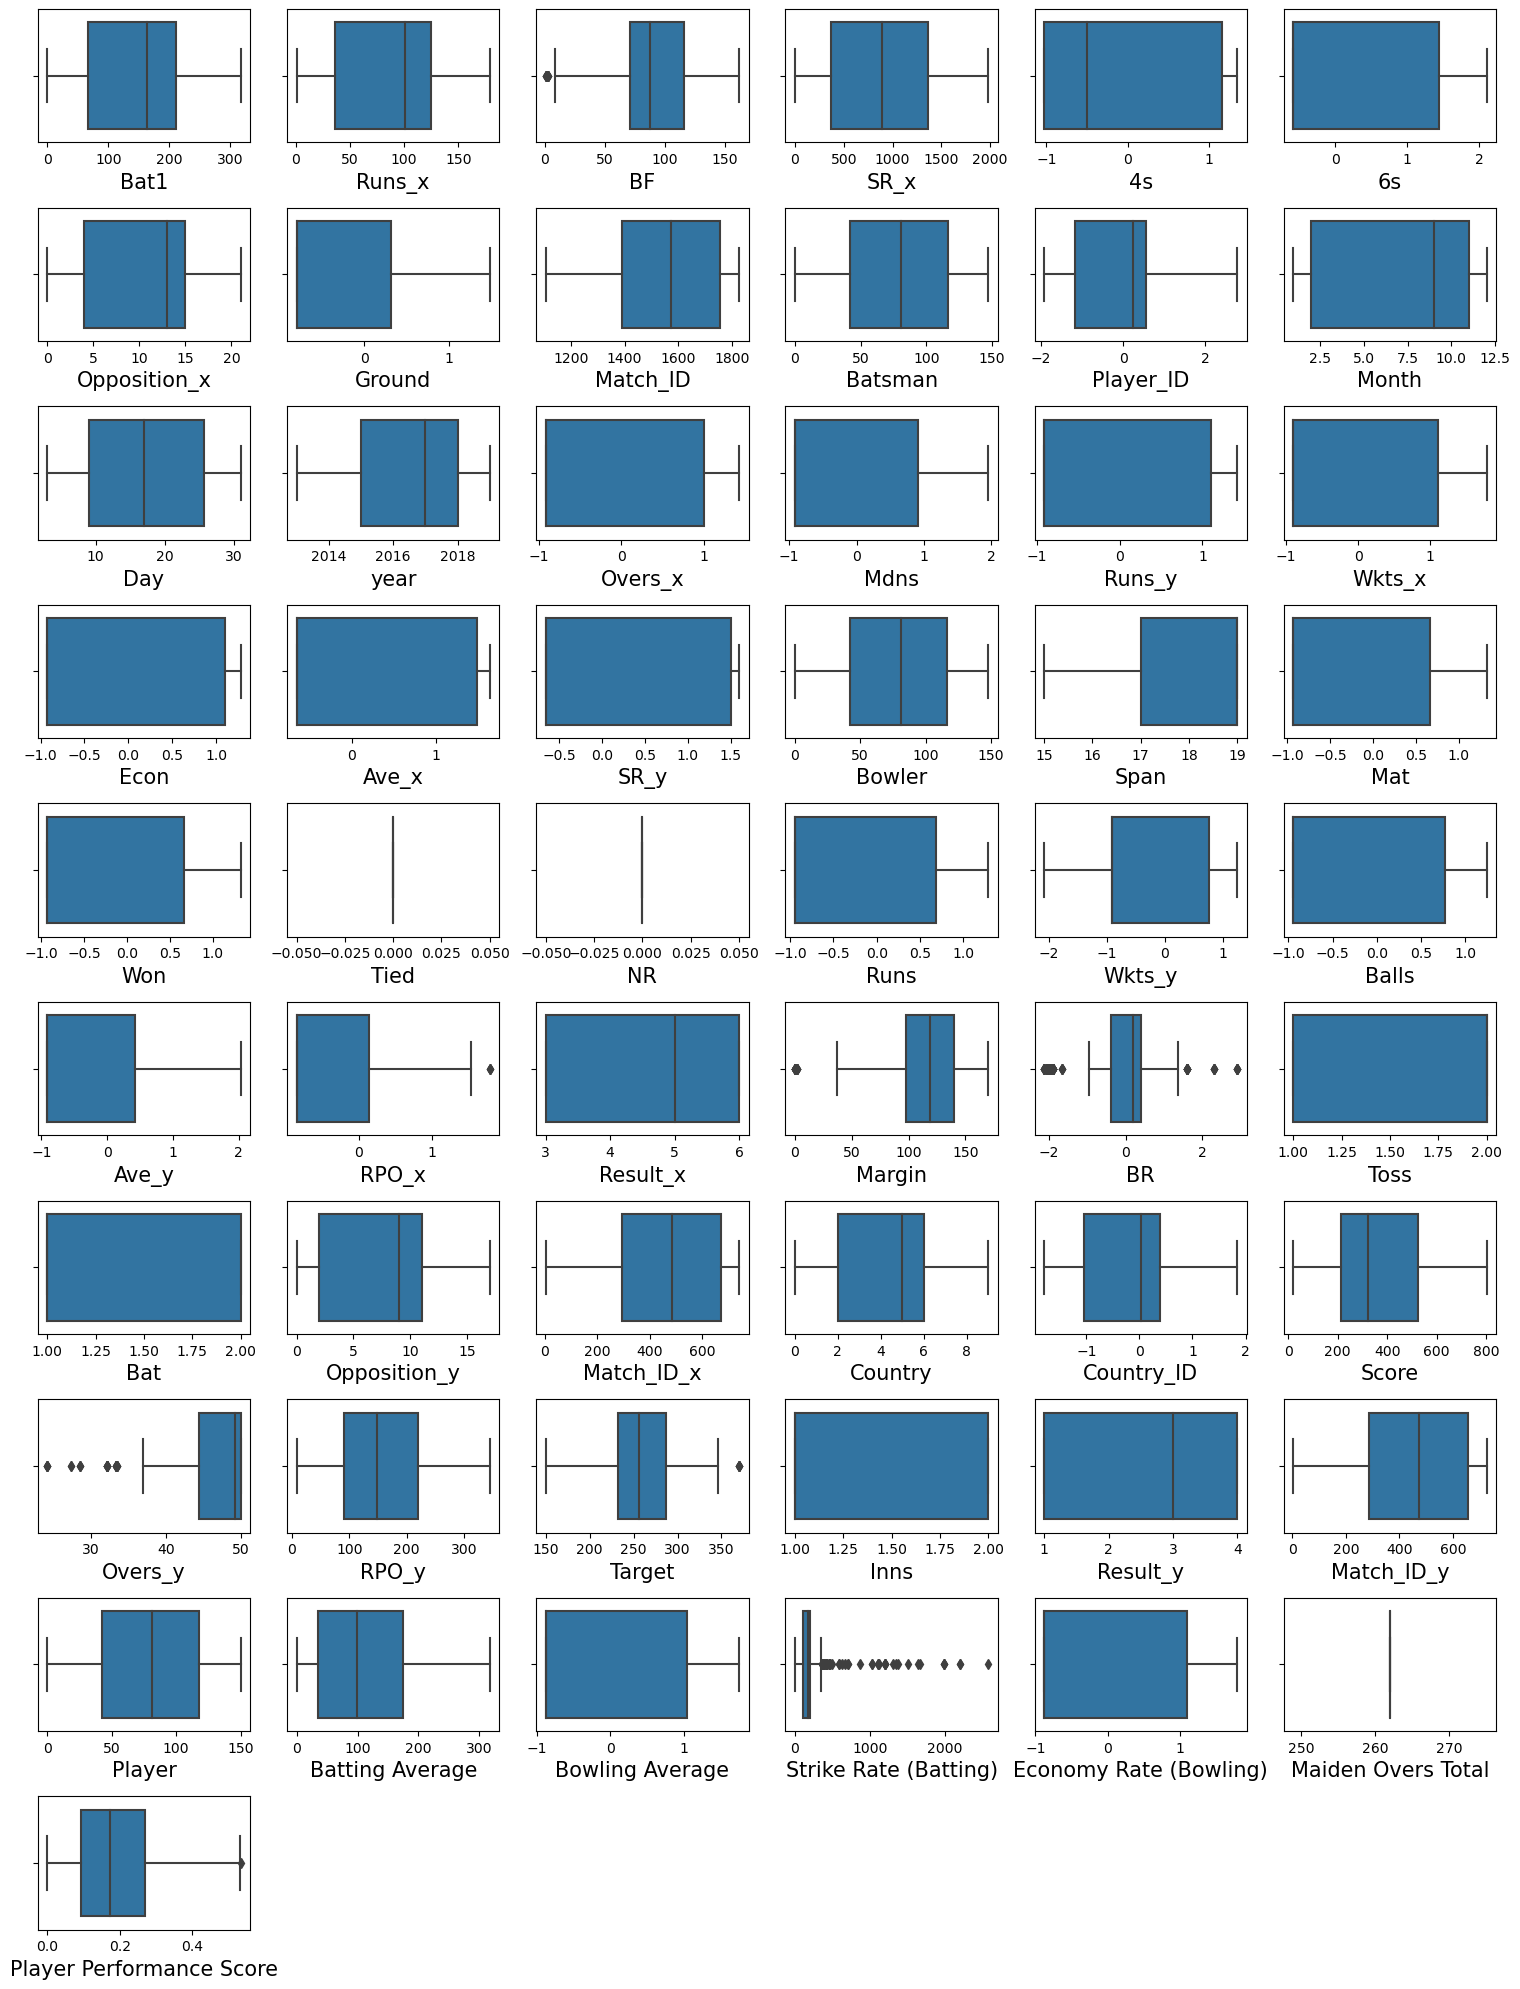

In [81]:
#Let's recheck for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [82]:
# Use 'Player Performance Score' as the target variable for the prediction model

x = master_after_join[['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
          'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
          'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
          'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
          'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
          'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
          'Result_y', 'Match_ID_y']]

y = master_after_join['Player Performance Score']  # Target column


In [83]:
print(x.shape, y.shape)

(414, 48) (414,)


In [84]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [85]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

             vif       featurs
0   3.243989e+02          Bat1
1   3.277185e+02        Runs_x
2   1.303874e+00            BF
3   1.315616e+00          SR_x
4   1.607081e+00            4s
5   1.321414e+00            6s
6   9.882804e+01  Opposition_x
7            inf        Ground
8            inf      Match_ID
9   3.778642e+04       Batsman
10  1.215122e+00     Player_ID
11  2.517729e+01         Month
12  1.565335e+00           Day
13  5.229427e+02          year
14  2.793929e+01       Overs_x
15  3.194069e+01          Mdns
16  5.153965e+01        Runs_y
17  6.467949e+01        Wkts_x
18  6.669962e+01          Econ
19  3.003716e+02         Ave_x
20  3.209849e+02          SR_y
21  3.777379e+04        Bowler
22           inf          Span
23           inf           Mat
24           inf           Won
25           NaN          Tied
26           NaN            NR
27           inf          Runs
28           inf        Wkts_y
29           inf         Balls
30           inf         Ave_y
31      

In [86]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)

array([[-2.31006925e+00,  1.08066625e+00,  2.47302186e+00, ...,
        -6.22406106e-17, -6.29550535e-16,  3.86435408e-17],
       [-2.48514790e+00,  2.39461326e+00,  2.79525159e+00, ...,
        -1.90884076e-16, -2.19891488e-16, -2.89249038e-16],
       [-4.02575408e+00,  3.24058708e+00, -3.18452429e+00, ...,
         1.95266464e-16, -6.42824147e-16, -1.72660129e-16],
       ...,
       [ 3.88626932e+00,  3.73177516e+00,  3.30350334e-01, ...,
        -1.05926065e-16,  3.56186779e-17, -4.10655884e-18],
       [ 3.36908499e+00,  4.33164653e+00,  3.12306338e-01, ...,
         3.96561293e-17, -5.14910336e-18,  2.44172818e-17],
       [ 4.27145979e+00,  1.25346997e+00,  5.55934189e-01, ...,
        -7.34522969e-17,  1.07347726e-17, -3.20576057e-17]])

Text(0.5, 1.0, 'PCA Plot')

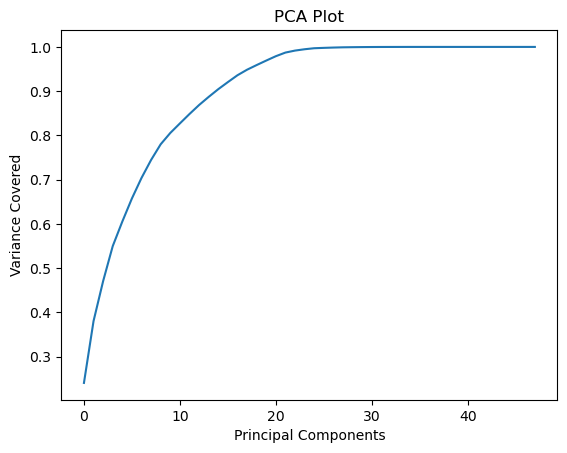

In [87]:
# Lets plot the PCA plot to select the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA Plot")

In [88]:
pca=PCA(n_components=19)
pca_x=pca.fit_transform(x_scaled)
pca_x=pd.DataFrame(pca_x,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
pca_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-2.310069,1.080666,2.473022,3.419201,0.719532,3.008466,0.858584,1.192495,1.119055,-0.834009,-0.113265,0.026162,-0.824383,0.456553,0.054640,-1.530483,-1.067383,1.811222,0.732439
1,-2.485148,2.394613,2.795252,3.116287,-1.193668,3.522896,-1.548201,-2.382589,-0.137813,0.613430,-0.044076,-0.053317,-0.117465,1.388368,0.745390,-1.077338,1.188699,-0.941087,-1.558304
2,-4.025754,3.240587,-3.184524,1.698911,-0.689603,0.791114,-0.614372,-0.772360,0.466250,-1.478286,0.132960,-0.490909,0.243706,0.684870,-1.825013,-1.729205,-0.378437,0.144972,0.156525
3,-1.376718,-2.807382,2.072543,2.463956,-1.096219,0.652159,1.456102,2.296638,1.086736,-0.008860,-2.250096,-0.574960,-1.722208,1.336490,-0.670760,0.009680,0.039045,1.668862,0.172293
4,-1.083281,-3.422891,1.900836,1.968804,-3.395546,1.371344,-0.681239,-1.327738,-0.299491,1.499024,-0.969965,1.468178,-1.427204,1.115861,0.130324,-0.011293,-0.602117,-0.429274,-1.055359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,3.773496,2.330712,-0.348755,-2.495956,-0.418132,-0.622893,0.375544,-1.127283,1.437581,-1.402458,-0.932074,0.834423,-0.088529,-0.037791,1.728318,-0.333422,-0.659521,2.335788,-0.975762
410,3.105490,2.400781,-1.382504,1.448562,1.540578,-2.652272,-0.528191,2.440662,-1.044925,-0.849262,-0.629356,1.582904,0.619584,-1.269522,1.153895,-0.318073,-1.254852,1.185133,-0.728284
411,3.886269,3.731775,0.330350,-0.943641,-0.395913,1.302100,-1.701910,-2.224492,-1.473293,0.844592,-1.326668,-0.995687,-0.695687,-1.560474,-0.061451,-1.545660,-1.048745,-0.363616,-1.765341
412,3.369085,4.331647,0.312306,-2.838551,-0.797400,-0.961250,-0.516971,-0.626311,1.296161,-1.410445,-1.992295,0.209325,-0.134870,0.362040,0.816394,0.168290,1.382078,0.232333,-0.049511


# Model Selection and Building

In [89]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= i )
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    y_pred=lr.predict(x_train) # prediction on train data
    r1 =r2_score(y_train,y_pred) # accuracy check on train data
    
    pred = lr.predict(x_test)   #prediction on test data
    r2 =r2_score(y_test,pred) #accuracy check on test data
    
    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.8085024638363909
at random sate 1, the testing accuracy is:- 0.7601575154226868


at random sate 2, the training accuracy is:- 0.8085024638363909
at random sate 2, the testing accuracy is:- 0.7601575154226868


at random sate 3, the training accuracy is:- 0.8085024638363909
at random sate 3, the testing accuracy is:- 0.7601575154226868


at random sate 4, the training accuracy is:- 0.8085024638363909
at random sate 4, the testing accuracy is:- 0.7601575154226868


at random sate 5, the training accuracy is:- 0.8085024638363909
at random sate 5, the testing accuracy is:- 0.7601575154226868


at random sate 6, the training accuracy is:- 0.8085024638363909
at random sate 6, the testing accuracy is:- 0.7601575154226868


at random sate 7, the training accuracy is:- 0.8085024638363909
at random sate 7, the testing accuracy is:- 0.7601575154226868


at random sate 8, the training accuracy is:- 0.8085024638363909
at random sate 8, the testing acc

In [90]:
rand_state

152

In [91]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= rand_state )

In [92]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(289, 19)
(125, 19)
(289,)
(125,)


In [93]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()

from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor()


import xgboost as xgb
xgb=xgb.XGBRegressor()

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

from sklearn.model_selection import cross_val_score


models=[]
models.append(('LinearRegression', LR))
models.append(('DecisionTreeRegressor', dt))
models.append(('AdaBoostRegressor', ada))
models.append(('GradientBoostingRegressor', gb))
models.append(('RandomForestRegressor', rfc))
models.append(('XGBRegressor', xgb))
models.append(('KNeighborsRegressor', knn))


In [94]:
m=[]
score=[]
score2=[]
cv_score=[]
MAE_score=[]
MSE_score=[]
for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred=model.predict(x_train)
    AS=r2_score(y_train,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)
    
    pred=model.predict(x_test)
    AS2=r2_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    MAE=mae(y_test,pred)
    print("Mean Squered Error:",MAE)
    MAE_score.append(MAE*100)
    MSE=mse(y_test,pred)
    print("Mean Absolute Error:", MSE)
    MSE_score.append(MSE*100)
    
    accuracies= cross_val_score(model,x,y, cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')

*********************** LinearRegression ***********************
LinearRegression()
Train Report: 0.808705986784928
Test Report: 0.7622839057822951
Mean Squered Error: 0.04515198533955697
Mean Absolute Error: 0.0037378396683897825
Accuracy: 83.98 %
Standard Deviation: 1.04 %


*********************** DecisionTreeRegressor ***********************
DecisionTreeRegressor()
Train Report: 1.0
Test Report: 0.46050752484380375
Mean Squered Error: 0.06767832809972925
Mean Absolute Error: 0.008482961076206465
Accuracy: 78.40 %
Standard Deviation: 0.93 %


*********************** AdaBoostRegressor ***********************
AdaBoostRegressor()
Train Report: 0.7956693036757636
Test Report: 0.5861382221614899
Mean Squered Error: 0.06335921054841362
Mean Absolute Error: 0.006507548323667042
Accuracy: 84.65 %
Standard Deviation: 1.63 %


*********************** GradientBoostingRegressor ***********************
GradientBoostingRegressor()
Train Report: 0.9777773545962725
Test Report: 0.6695554507772457
M

In [95]:
print(len(m),len(score),len(score2),len(cv_score),len(MAE_score),len(MSE_score))

7 7 7 7 7 7


In [96]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score, 'MAE_score':MAE_score,'MSE_score':MSE_score })
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score
0,LinearRegression,80.870599,76.228391,83.980412,4.515199,0.373784
1,DecisionTreeRegressor,100.000000,46.050752,78.399725,6.767833,0.848296
2,AdaBoostRegressor,79.566930,58.613822,84.653363,6.335921,0.650755
3,GradientBoostingRegressor,97.777735,66.955545,94.554740,5.414131,0.519590
4,RandomForestRegressor,94.672504,65.281991,90.938049,5.672690,0.545905
5,XGBRegressor,99.996785,60.949399,91.108790,6.024492,0.614030
6,KNeighborsRegressor,68.716540,55.849085,-4.260913,6.339765,0.694227


In [97]:
result['lest_diff']=(result['Accuracy_test_score']-result['Cross_val_score'])
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score,lest_diff
0,LinearRegression,80.870599,76.228391,83.980412,4.515199,0.373784,-7.752021
1,DecisionTreeRegressor,100.000000,46.050752,78.399725,6.767833,0.848296,-32.348972
2,AdaBoostRegressor,79.566930,58.613822,84.653363,6.335921,0.650755,-26.039541
3,GradientBoostingRegressor,97.777735,66.955545,94.554740,5.414131,0.519590,-27.599195
4,RandomForestRegressor,94.672504,65.281991,90.938049,5.672690,0.545905,-25.656058
5,XGBRegressor,99.996785,60.949399,91.108790,6.024492,0.614030,-30.159392
6,KNeighborsRegressor,68.716540,55.849085,-4.260913,6.339765,0.694227,60.109998


so from above least diff deetween the accuracy i am Selecting the Linear regression model is best model with 76% Accuracy.

# HyperParameter Tuning

In [98]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_jobs':range(1,55)}
rand=RandomizedSearchCV(estimator=LR, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'n_jobs': 32}

In [99]:
LR= LinearRegression(n_jobs= 17)

LR.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=r2_score(y_train,y_pred)
print("Train Report:",AS*100) 
pred=LR.predict(x_test)
AS2=r2_score(y_test,pred)
print("Test Report:",AS2*100)
MAE=mae(y_test,pred)
print("Mean Squered Error:",MAE)
MSE=mse(y_test,pred)
print("Mean Absolute Error:", MSE)
    
accuracies= cross_val_score(LR,x_scaled, y, cv=5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 79.56693036757636
Test Report: 76.22839057822951
Mean Squered Error: 0.04515198533955697
Mean Absolute Error: 0.0037378396683897825
Accuracy: 86.42 %
Standard Deviation: 2.27 %
